In [1]:
import muon_functions as mf
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "figure.figsize": (15,6),
    #"figure.dpi": 300,
    'font.size': 30,
    #'axes.grid': True
    
})

In [2]:
muons = mf.intersecting_muons(50000)

In [3]:
approaches = np.empty(len(muons))

for i in range(muons.size):
    approaches[i] = muons[i].closest_approach((0,0,0))

Text(0, 0.5, 'Count')

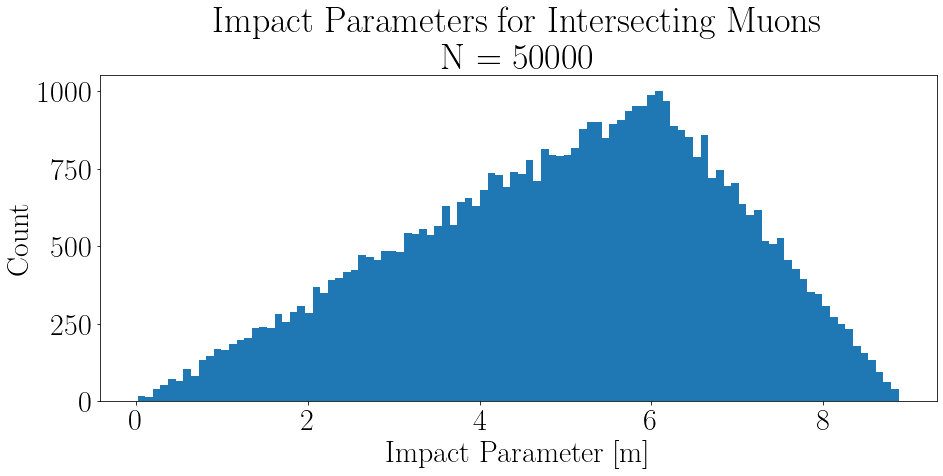

In [4]:
fig, ax = plt.subplots()
ax.hist(approaches, bins = 100)
ax.set_title('Impact Parameters for Intersecting Muons\n N = 50000')
ax.set_xlabel('Impact Parameter [m]')
ax.set_ylabel('Count')

In [5]:
energies = [muon.energy for muon in muons]

In [6]:
np.mean(energies)

print(muons[0])

In [7]:
path_lengths = []
for muon in muons:
    path_lengths.append(mf.path_length(muon, mf.OuterDetector()))

In [8]:
def plot_path_lengths(paths, savefile = False):
    ''' A function designed to plot a histogram of the points from the previous intersection_points function. Pass this function an array
    argument equivalent to the output from the previous.
    '''
    import matplotlib.pyplot as plt
    plt.rcParams.update({
    "figure.figsize": (20,8),
    "text.usetex": True,})

    pathLengths = []
    top_bottom = [] #Muons that pass through both top and bottom
    top_side = []
    side_side = []
    ssCount = 0
    side_bottom = []

    ##(entryPoint, entryLabel, exitPoint, exitLabel)
    for path in paths:
        if not type(path) is bool: #If there is an entry point
            if type(path[1]) is str:
                pathLength = path[0]
                #If points are both top and bottom, append there
                if path[1] == 'TOP' and path[2] == 'BOT':
                    top_bottom.append(pathLength)
                #If points are top side, append there
                elif path[1] == 'TOP' and path[2] == 'SIDE':
                    top_side.append(pathLength)
                #If points are side side, append there
                elif path[1] == 'SIDE' and path[2] == 'SIDE':
                    side_side.append(pathLength)
                    ssCount += 1
                #If points are side bottom, append there
                elif path[1] == 'SIDE' and path[2] == 'BOT':
                    side_bottom.append(pathLength)
                pathLengths.append(pathLength)
            else:
                print(' Points input for path_lengths function requires labels being switched on ')

    bins = 100
    counts_tb, bins_tb = np.histogram(top_bottom, bins = bins, density=False)
    counts_ts, bins_ts = np.histogram(top_side, bins = bins, density=False)
    counts_ss, bins_ss = np.histogram(side_side, bins = bins, density=False)
    counts_sb, bins_sb = np.histogram(side_bottom, bins = bins, density=False)

    counts, bins = np.histogram(pathLengths, bins = 50, density=False)
    plt.figure()
    plt.hist(bins[:-1], bins, weights=counts, histtype='stepfilled', alpha=0.4, color='orange', label = 'Total')
    plt.xlabel('Path Length [m]', size = 'large'); plt.ylabel('Count', size = 'large')
    #plt.text(1, counts[0]*1.5, 'Mean = ' + str(np.average(pathLengths)), size = 12)
    plt.title('Path Length Distribution: '+ str(len(pathLengths)) + ' paths', size = 'x-large')

    #Plotting other subordinate hists
    top_bot = str(len(top_bottom)*100/len(pathLengths))[0:4]
    plt.hist(bins_tb[:-1], bins, weights=counts_tb, histtype='step', alpha=1.0, color='blue', label = r'Top $\rightarrow$ Bottom: ' + top_bot + '\%')
    top_sides = str(len(top_side)*100/len(pathLengths))[0:4]
    plt.hist(bins_ts[:-1], bins, weights=counts_ts, histtype='step', alpha=1.0, color='green', label = r'Top $\rightarrow$ Side: ' + top_sides + '\%')
    sides = str(len(side_side)*100/len(pathLengths))[0:4]
    plt.hist(bins_ss[:-1], bins, weights=counts_ss, histtype='step', alpha=1.0, color='red', label = r'Side $\rightarrow$ Side: ' + sides + '\%')
    side_bot = str(len(side_bottom)*100/len(pathLengths))[0:4]
    plt.hist(bins_sb[:-1], bins, weights=counts_sb, histtype='step', alpha=1.0, color='purple', label = r'Side $\rightarrow$ Bottom: ' + side_bot + '\%')

    plt.yscale('log')
    plt.legend(loc = 8, fontsize = 'small')
    #plt.grid()
    #print('Mean:', np.mean(pathLengths))
    if savefile:
        plt.savefig('pathLengths.png', facecolor = 'white')

    plt.show()

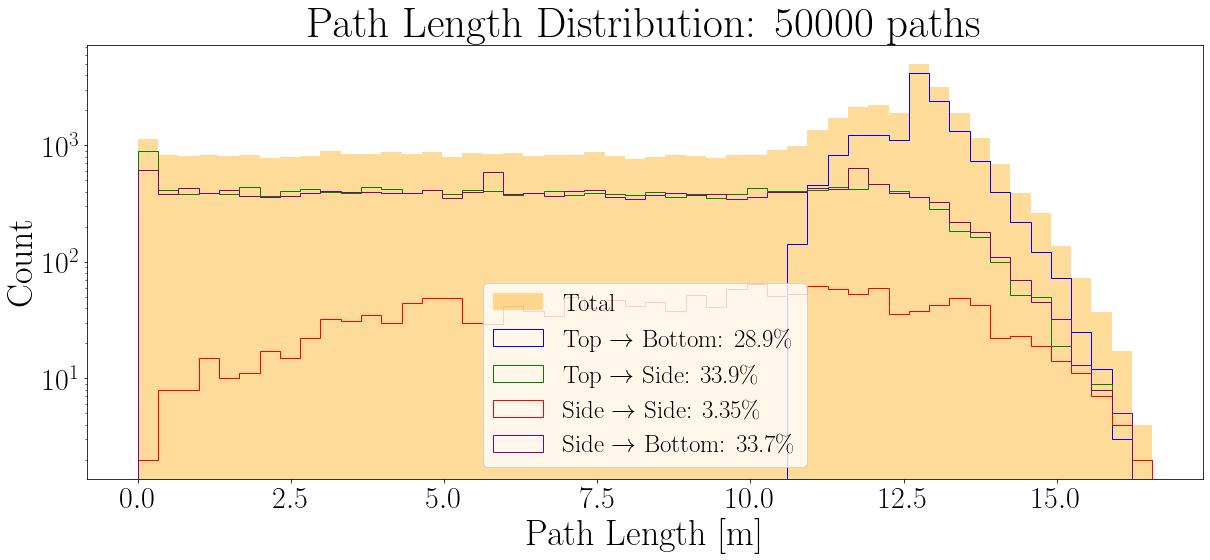

In [9]:
plot_path_lengths(path_lengths, savefile=True)

In [10]:
photons = [mf.get_cherenkov(muon, mf.OuterDetector()) for muon in muons]
photons = np.array(photons)

In [11]:
photons

array([[4.67911000e+05, 7.22450636e-01],
       [3.34015000e+05, 7.22450645e-01],
       [4.09030000e+05, 7.22450651e-01],
       ...,
       [6.70900000e+04, 7.22450647e-01],
       [4.47185000e+05, 7.22450650e-01],
       [1.08411000e+05, 7.22450649e-01]])

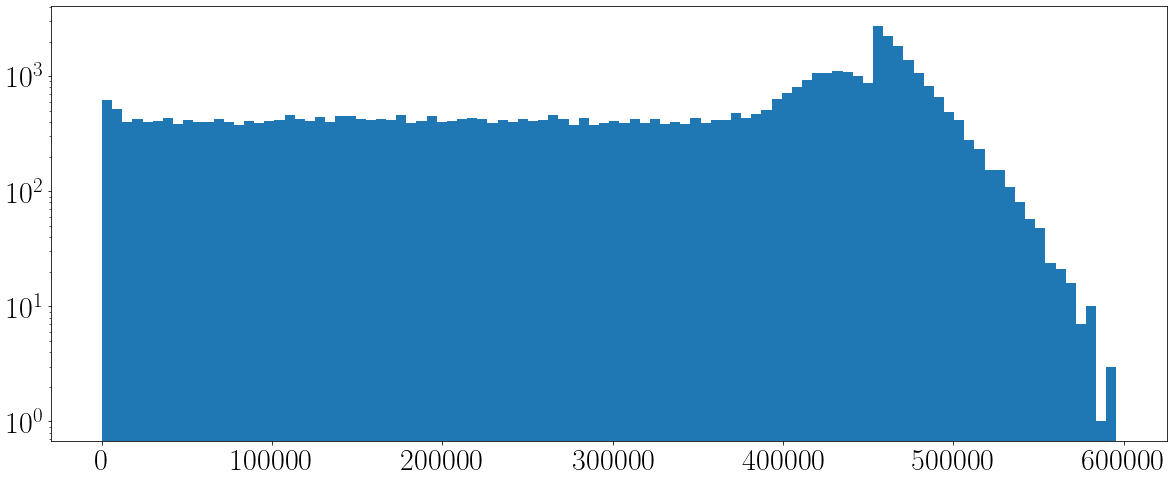

In [12]:
plt.hist(photons[:,0], bins = 100)
plt.yscale('log')

In [13]:
od = mf.OuterDetector()

Text(0, 0.5, 'Number of Cherenkov Photons in Path')

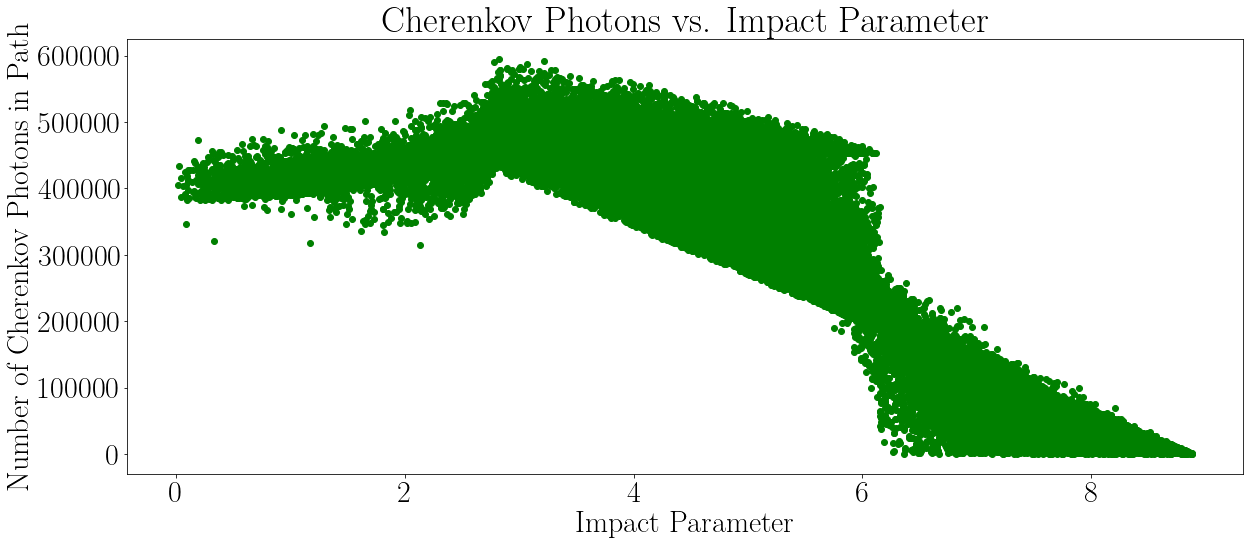

In [14]:
plt.scatter(approaches, photons[:,0], color = 'g')
plt.title('Cherenkov Photons vs. Impact Parameter')
plt.xlabel('Impact Parameter'); plt.ylabel('Number of Cherenkov Photons in Path')

# PLOT:

What we want to plot is the Path_Length or the Number of Cherenkov photons vs. the impact parameter, and color code the points for the type of entry/exit

In [15]:
tb = []
ts = []
ss = []
sb = []

for i in range(muons.size):
    path_length = mf.path_length(muons[i])
    approach = muons[i].closest_approach((0,0,+0.2))
    N_photons = mf.get_cherenkov(muons[i])[0]
    
    pathLength = np.array([path_length[0], approach, N_photons])
    
    if path_length[1] == 'TOP' and path_length[2] == 'BOT':
        tb.append(pathLength)
    #If points are top side, append there
    elif path_length[1] == 'TOP' and path_length[2] == 'SIDE':
        ts.append(pathLength)
    #If points are side side, append there
    elif path_length[1] == 'SIDE' and path_length[2] == 'SIDE':
        ss.append(pathLength)
    #If points are side bottom, append there
    elif path_length[1] == 'SIDE' and path_length[2] == 'BOT':
        sb.append(pathLength)

top_bottom = np.array(tb)
top_side = np.array(ts)
side_side = np.array(ss)
side_bottom = np.array(sb)

In [16]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "figure.figsize": (15,6),
    "figure.dpi": 300,
    'font.size': 30,
    'axes.grid': True
    
})

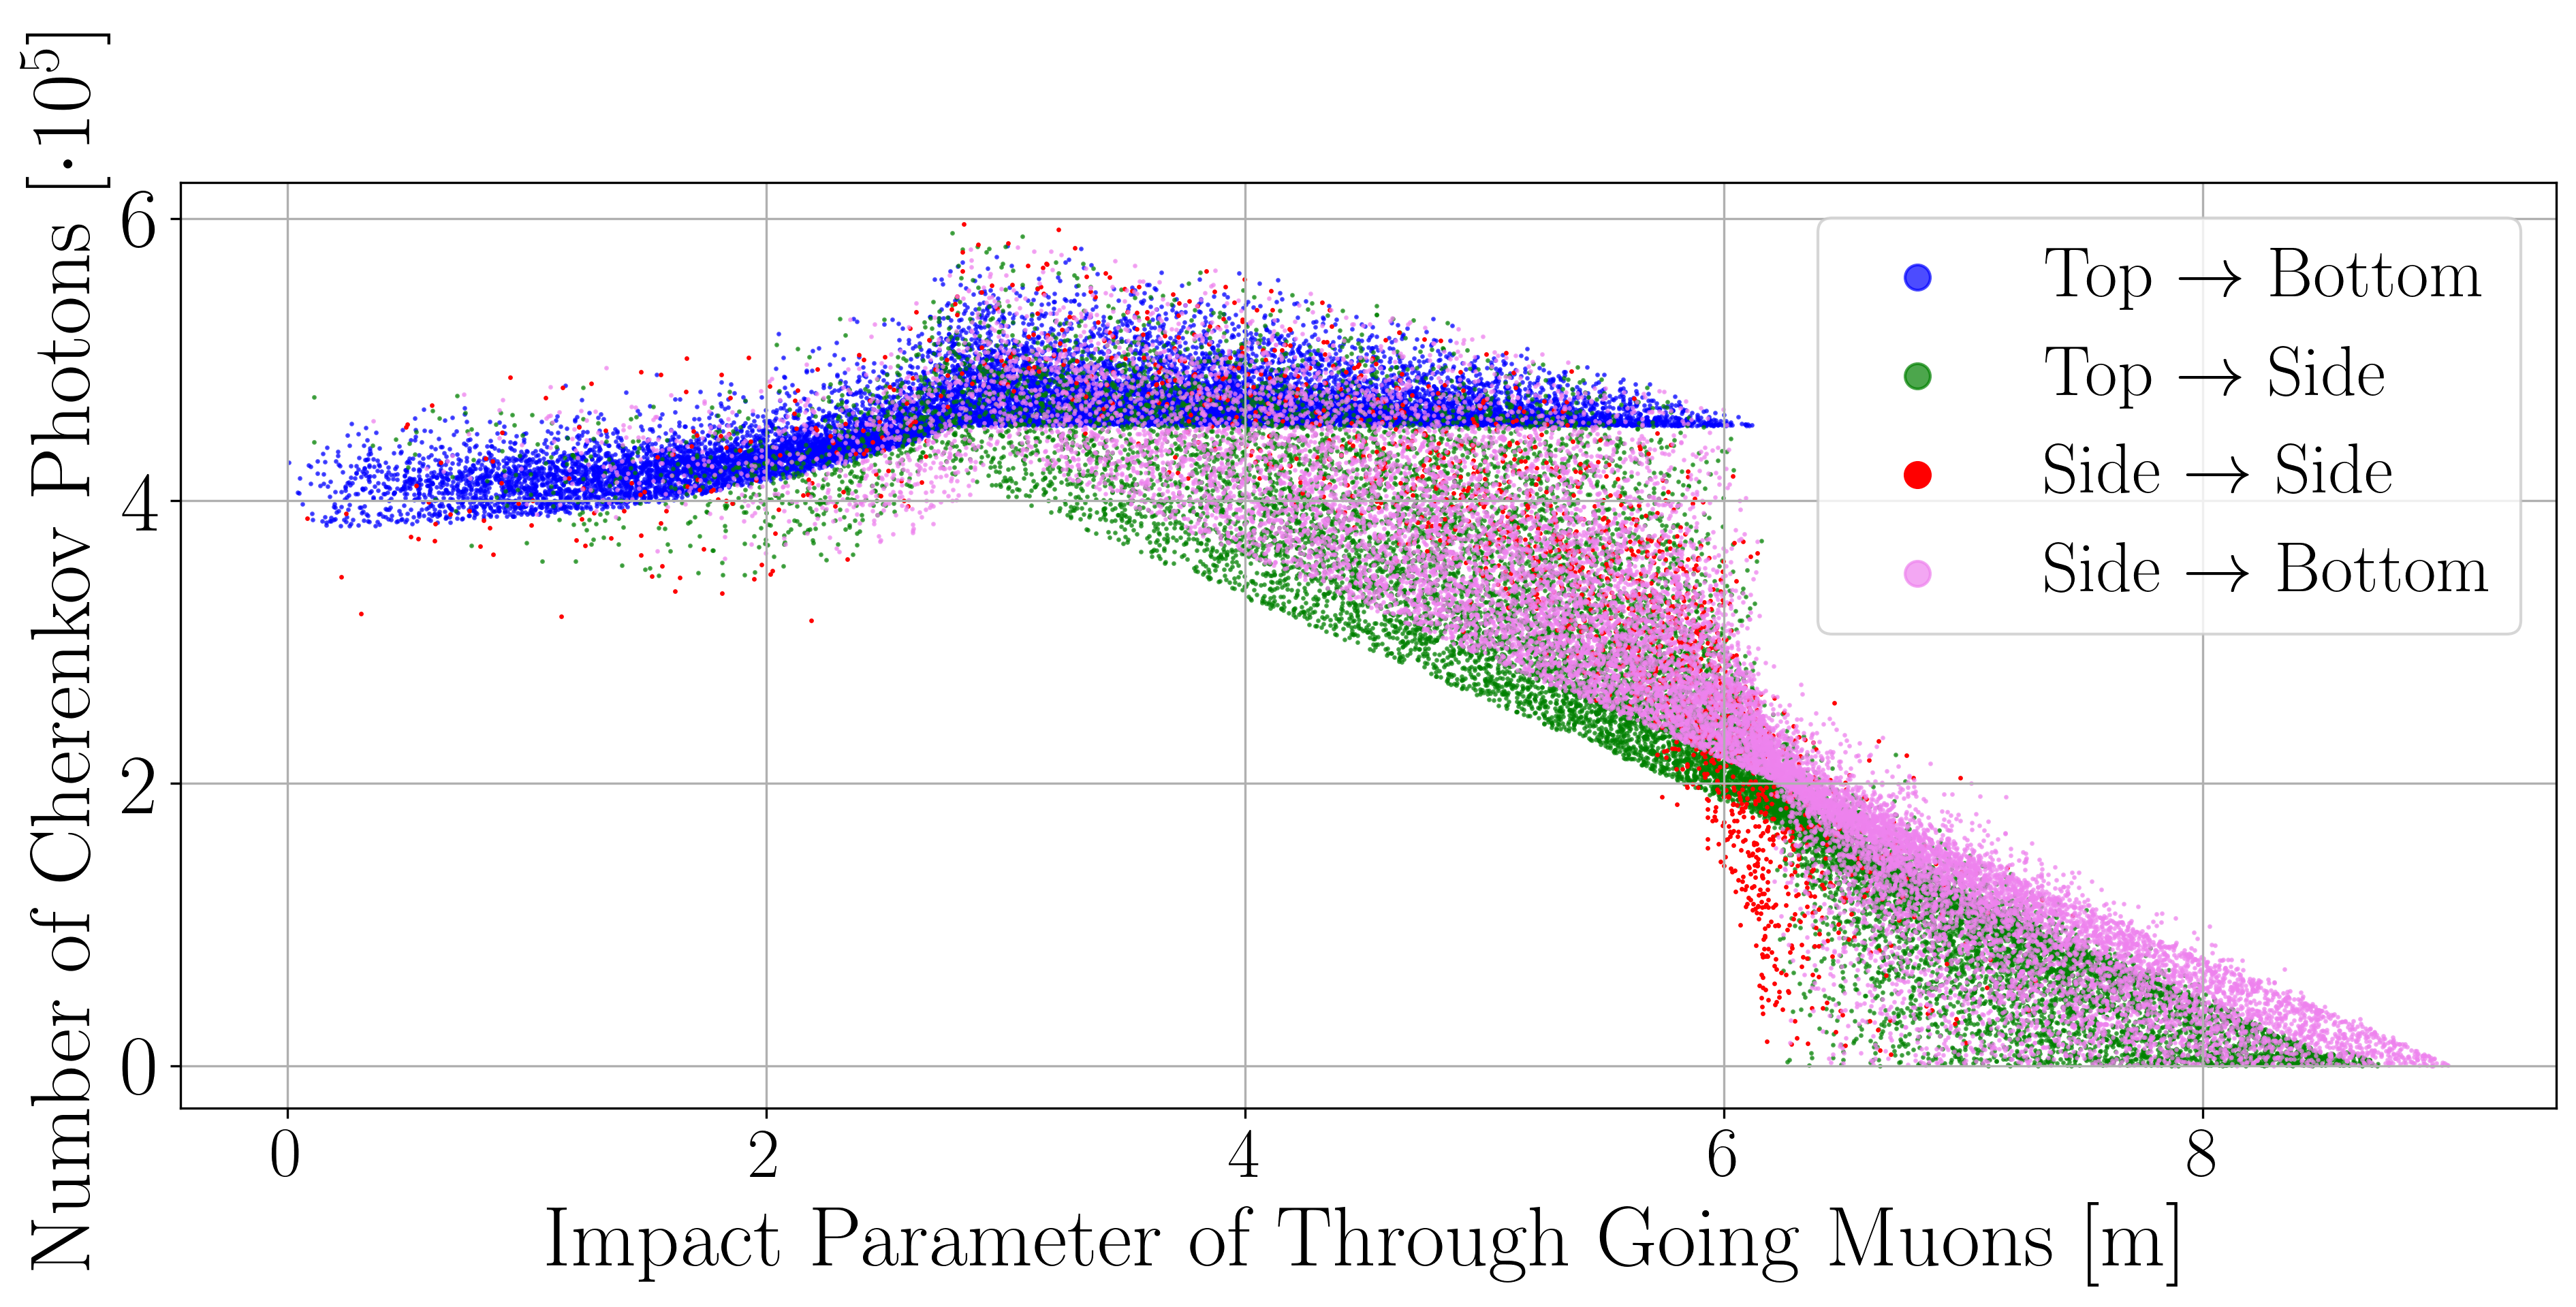

In [17]:
plt.scatter(top_bottom[:,1], top_bottom[:,2]/1e5, label = r'Top $\rightarrow$ Bottom', alpha = 0.7, s = 0.4, c = 'b')
plt.scatter(top_side[:,1], top_side[:,2]/1e5, label = r'Top $\rightarrow$ Side', alpha = 0.7, s = 0.4, c = 'g')
plt.scatter(side_side[:,1], side_side[:,2]/1e5, label = r'Side $\rightarrow$ Side', alpha = 1, s = 0.4, c = 'r')
plt.scatter(side_bottom[:,1], side_bottom[:,2]/1e5, label = r'Side $\rightarrow$ Bottom', alpha = 0.7, s = 0.4, c = 'violet')
plt.ylabel('Number of Cherenkov Photons [$\cdot 10^5$]')
plt.xlabel('Impact Parameter of Through Going Muons [m]')
#plt.title('Cherenkov Photons vs. Muon Impact Parameter')
plt.legend(markerscale = 14, fontsize = 'small')
plt.xticks(fontsize='small')
plt.savefig('impact_param.png', facecolor = 'w')

In [18]:
from scipy import constants as cst
import pandas as pd
E = 363 # GeV
muon = mf.generate_muons(1)[0]
beta = np.sqrt(1-(muon.rest_mass_MeV/(1000*E + muon.rest_mass_MeV))**2) # Relativistic Kinetic Energy
ior = lambda gamma: np.interp(gamma, pd.read_csv('nH2O.csv')['wl'], pd.read_csv('nH2O.csv')['n'])
dNdlambda = lambda gamma : ((2*np.pi*cst.e**2)/(cst.hbar*cst.c**2))*(1-(1/(beta**2*ior(gamma)**2)))

In [19]:
from scipy import constants as cst
from scipy.integrate import quad
import pandas as pd

h2o = pd.read_csv('nH2O(2).csv')

water_wl = np.array(h2o['wl [um]'], dtype = float)*1000
water_n = np.array(h2o['n'], dtype = float)

E = mf.SNOLAB_MU_E_AVG
beta = np.sqrt(1-(mf.mu_rest_mass_MeV/(1000*E + mf.mu_rest_mass_MeV))**2) # Relativistic Kinetic Energy
index = lambda wl : np.interp(wl, water_wl, water_n)

dNdwl = lambda wl : ((2*np.pi*cst.e**2)/(cst.hbar*cst.c**2))*(1-(1/(beta**2*index(wl)**2)))

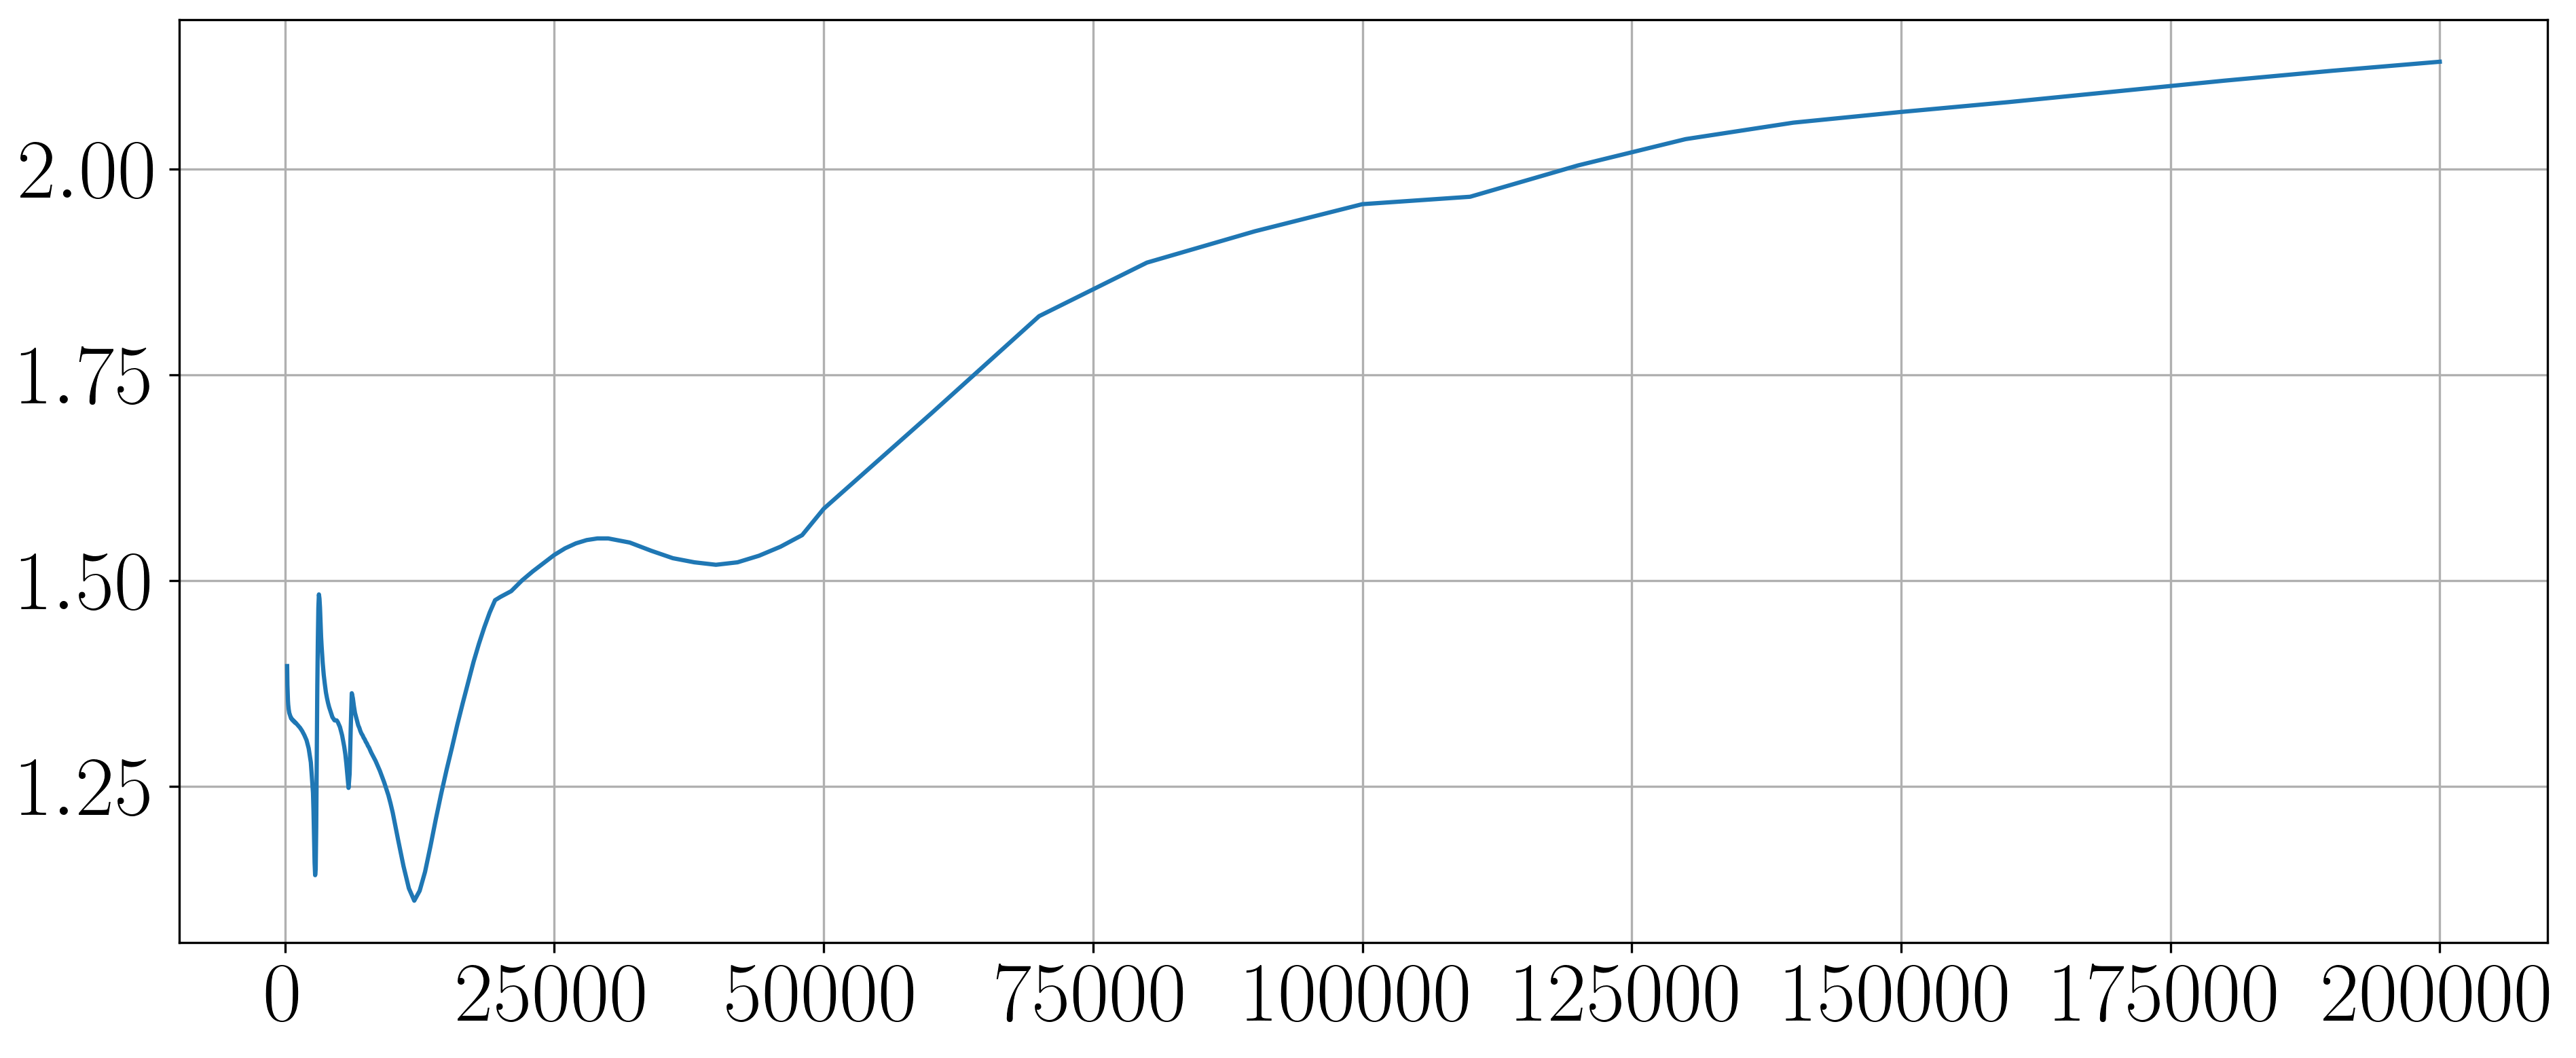

In [20]:
plt.plot(water_wl, water_n)

In [1]:
wavelengths = np.linspace(250, 650, 100)
probs = dNdwl(wavelengths)
probs = probs/np.sum(probs)*100

qe = pd.read_csv('R5912QE.csv')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica",
    "figure.figsize": (18,8),
    "figure.dpi": 300,
    'font.size': 30,
    'axes.grid': True
    
})

fig, ax = plt.subplots()

ax.fill_between(qe['wl [nm]'], qe['QE [%]'], alpha = 0.4,label = 'PMT Quantum Efficiency [\%]')
plt.plot(qe['wl [nm]'], qe['QE [%]'], color = 'blue')
ax.set_xlabel('Wavelength [nm]'); #ax.set_ylabel('Arbitrary Units')
plt.legend(loc=(0.55, 0.78), fontsize = 'small', framealpha = 1)
ax2 = ax.twinx()
ax2.fill_between(wavelengths,y1= probs.min(), y2=probs, alpha = 0.4, color = 'orange', label = r'Cherenkov $dN/d\lambda$ [Arb. Units]')
ax2.grid()
plt.plot(wavelengths, probs, color = 'orange')
ax2.axis('off')
ax2.set_yticklabels('')
plt.xlim((250,650));
plt.legend(loc=(0.55, 0.68), fontsize = 'small', framealpha = 1)
plt.title('Cherenkov Spectrum and PMT Q.E.')

plt.savefig('cherenkov_qe.png', facecolor = 'w')


NameError: name 'np' is not defined

In [24]:
import muon_functions as mf
import numpy as np

In [25]:
muons = mf.generate_muons(int(1e6))


In [26]:
energies = np.linspace(0.5, 1e5, int(1e6))

In [27]:
probs = mf.mh_energy_probs(energies)

NameError: name 'arra' is not defined

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(energies, probs)